# **PREDICTING PULSAR STAR**


---



NAMA : FUADISSALIM

NIM  : 5311422123


---


**INSTALL LIBRARY**



---



In [32]:
import numpy as np #mengimport numpy sebagai np
import pandas as pd #mengimport pandas sebagai pd
import seaborn as sns #mengimport seaborn sebagai sns
import matplotlib.pyplot as plt #mengimport matplotlib.pyplot sebagai plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #mengimport confusion_matrix, accuracy_score, classification_report dari sklearn.metrics
from sklearn.svm import SVC #mengimport svc daru sklearn.svm
from sklearn.preprocessing import StandardScaler #mengimport standarscaler dari sklearn.preprocessing
from sklearn.model_selection import train_test_split #mengimport train_test_split dari sklearn.model_selection

**IMPORT DATA**


---



In [33]:
df = pd.read_csv ('/content/pulsar_stars.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0




---



**1. Data Understanding**


---



Melalui dataset yang diberikan, diketahui bahwa data tersebut memiliki total 17898 baris dan 9 kolom

In [4]:
print("Data Shape: ", df.shape) #berfungsi menampilkan jumlah row dan coulom pada data yang diberikan

Data Shape:  (17898, 9)


pada dataset, diketahui bahwa tipe data yang digunakan pada 9 kolom ada 2 jenis yaitu, tipe data float64 dengan 8 kolom dan tipe data int 64 dengan 1 kolom

In [10]:
df.info() #melihat tipe data yang digunakan pada kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB




---
code dibawah berfungsi menampilkan statistik deskriptif dari semua kolom


In [6]:
df[[' Mean of the integrated profile',' Standard deviation of the integrated profile',' Excess kurtosis of the integrated profile',' Skewness of the integrated profile',' Mean of the DM-SNR curve',' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve','target_class']].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


melalui fungsi dibawah, didapatkan bahwa terdapat 1639 pulsar star dan 16259 bukan pulsar star. 0 disini menandakan bukan dan 1 menandakan ada atau iya

In [9]:
df.target_class.value_counts() #berfungsi untuk menghitung jumlah kemunculan tiap kelas unik dari kolom target_class dalam DataFrame.

0    16259
1     1639
Name: target_class, dtype: int64



---


**2. Cleaning Data**


---



In [11]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

melalui fungsi diatas, didapati bahwa tidak terdapat jumlah nilai missing pada tiap kolomnya

In [12]:
df.duplicated().sum()

0

berdasarkan fungsi diatas, dataset ternyata tidak ada baris yang mengalami duplikasi dalam dataframenya



---



**3. Exploratory Data Analysis (EDA)**



---



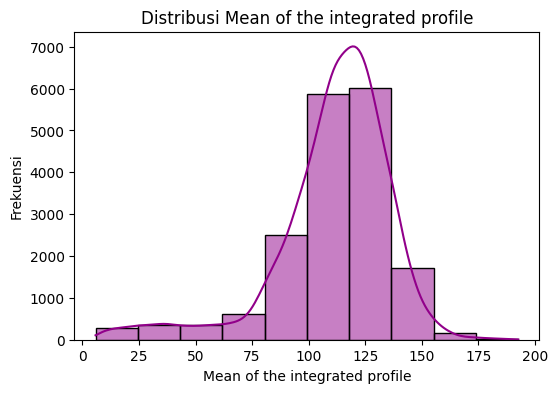

In [13]:
plt.figure (figsize=(6,4))
sns.histplot (data=df, x=' Mean of the integrated profile', bins=10, kde=True, color='#91008a')

plt.title ('Distribusi Mean of the integrated profile')
plt.xlabel ('Mean of the integrated profile')
plt.ylabel ('Frekuensi')
plt.show()

grafik diatas menunjukan pada distribusi Mean of the integrated profile didominasi pada Mean of the integrated profile 125 dengan frekuensinya sekitar 6000

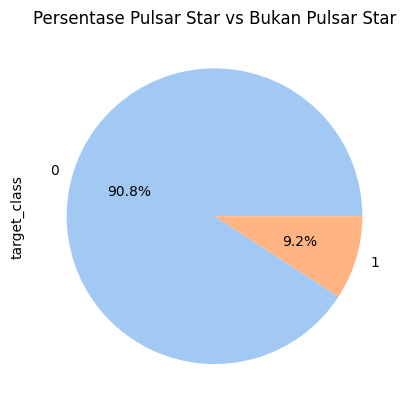

In [14]:
sns.set_palette('pastel')
df['target_class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Pulsar Star vs Bukan Pulsar Star')
plt.show()

Perentase terhadap pulsar star vs bukan pulsar star didapatkan bahwa 9.2% adalah pulsar star dan 90.8% bukan pulsar star

<ipython-input-31-7d3036273eef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target_class', palette='rocket',)


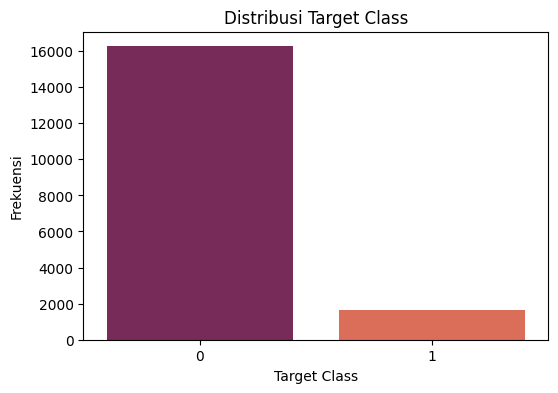

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target_class', palette='rocket',)

plt.title('Distribusi Target Class')
plt.xlabel('Target Class')
plt.ylabel('Frekuensi')
plt.show()

Melalui grafik distribusi Target Class frekuensi kemunculan data 1 atau pulsar star kurang dari 2000 dan kemunculan data 0 atau bukan pulsar star lebih dari 16000

In [34]:
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


Korelasi antara baris dan kolom tersebut menandakan baik jika nilainya mendekati 1, contohnya pada atribut Standard deviation of the integrated profile terhadap Mean of the integrated profile memiliki nilai yang mendekati 1 dan atribut ini memiliki korelasi yang cukup baik

<Axes: >

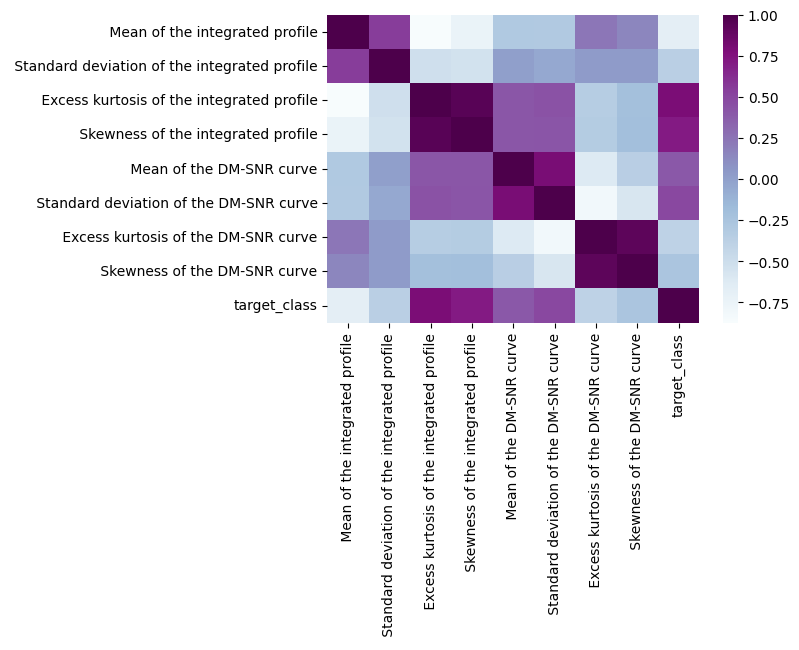

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu')

korelasi akan divisualisasikan dengan fungsi diatas. Disini warna gelap menandakan memiliki korelasi atribut yang baik dan kalau warnanya pudar, korelasi atributnya tidak baik



---



**4. Preparation Data**



---



In [36]:
x= df.drop(columns=['target_class'])
y= df['target_class']

print("X : ", x.shape)
print("y : ", y.shape)

X :  (17898, 8)
y :  (17898,)


DataFrame x memiliki 17898 baris dan 8 kolom setelah kolom "target_class" dihapus.
DataFrame y memiliki 17898 baris yang dibaca pada kolom target_class

In [37]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform (x)

digunakan untuk melakukan proses standardisasi pada data Anda, khususnya pada DataFrame x.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

digunakan untuk membagi data Anda menjadi set latih (training set) dan set uji (testing set).



---



**5. Modelling & Evaluation**



---



In [39]:
clf = SVC (kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM: {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.81      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Akurasi SVM: 97.88%


akurasi SVM dari dataset ini didapati sebesar 97.88%
nilai f1-score pada label 0 0.99%
nilai f1-score pada label 1 0.87%



---



**6. Testing**



---



In [40]:
new_data = {' Mean of the integrated profile': [192.617188],
            ' Standard deviation of the integrated profile': [39.341649],
            ' Excess kurtosis of the integrated profile': [0.127978],
            ' Skewness of the integrated profile': [1.123492],
            ' Mean of the DM-SNR curve': [3.642977],
            ' Standard deviation of the DM-SNR curve': [13.381731],
            ' Excess kurtosis of the DM-SNR curve': [2.945244],
            ' Skewness of the DM-SNR curve': [53.593661]}

new_data = pd.DataFrame(new_data)
new_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,192.617188,39.341649,0.127978,1.123492,3.642977,13.381731,2.945244,53.593661


In [41]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print ("Diagnosis Data Baru: ", y_pred_new)


Diagnosis Data Baru:  [0]
